# Dependance of H2O wrt airmass

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2024/11/17
- last update : 2024/11/17


This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
from getObsAtmo.getObsAtmo import ObsAtmo,validateObsName,Dict_Of_sitesPressures,getObsSiteDataFrame

# Check information

In [4]:
Dict_Of_sitesPressures

{'LSST': 731.50433,
 'CTIO': 774.6052,
 'OHP': 937.22595,
 'PDM': 710.90637,
 'OMK': 600.17224,
 'OSL': 1013.0}

### Choose Rubin-LSST observation sites but other sites may be chosen

In [5]:
obssitename = 'LSST'
obs_str = validateObsName(obssitename) 
std_pressure = Dict_Of_sitesPressures[obs_str]

In [6]:
emul =  ObsAtmo(obs_str= obssitename)

LSST site name validated as LSST observatory


# Typical transmission plot

- show a typical transmission plot

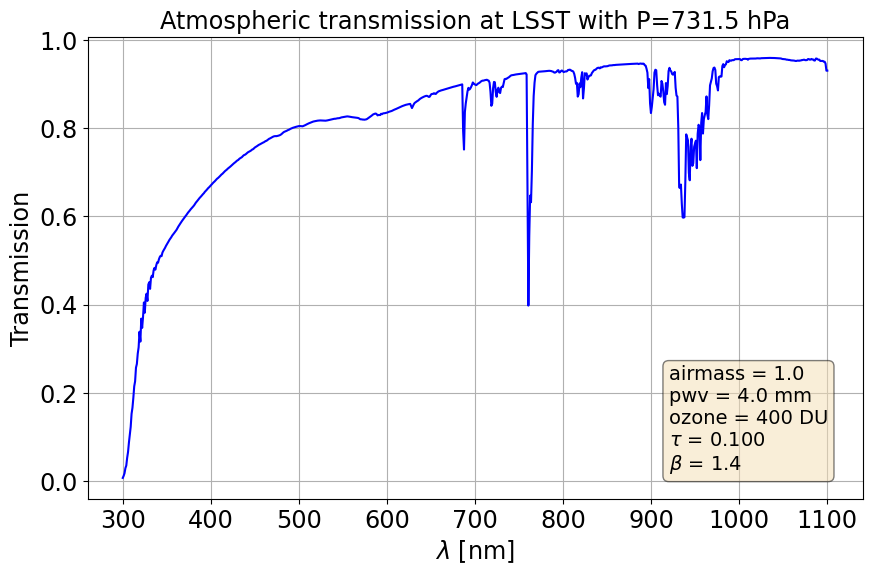

In [7]:
emul.plot_transmission()

# Setting atmospheric parameters

In [8]:
WL = emul.GetWL()
airmasses = emul.AIRMASS
NAM = len(airmasses)
pwvs = emul.PWV
NPWV = len(pwvs)
ozs = emul.OZ
NOZ = len(ozs)

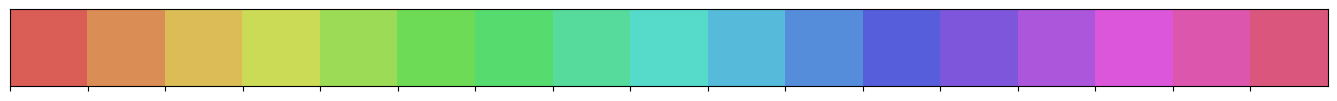

In [9]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

## Check emulator with PWV absorption

Expect no difference

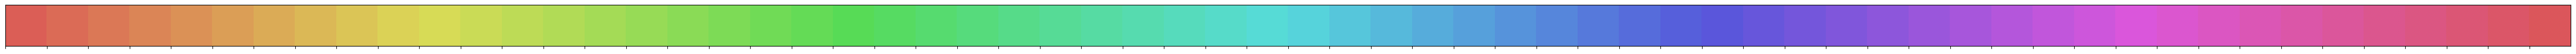

In [10]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


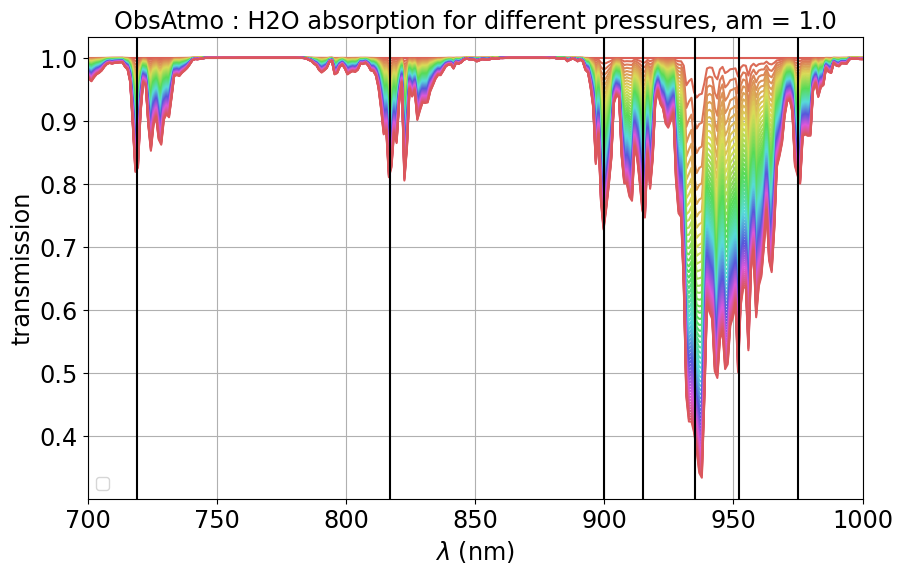

In [11]:
am =1

fig, ax = plt.subplots()
for idx,pwv in enumerate(pwvs):

    transm = emul.GetPWVabsTransparencyArray(WL,am,pwv)
  
    if idx == 0: 
        ax.plot(WL,transm,"-",color=hls_colors[idx])
    else: 
        ax.plot(WL,transm,"-",color=hls_colors[idx])
        
title = f"ObsAtmo : H2O absorption for different pressures, am = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(700.,1000.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

ax.axvline(719.0,color="k")
ax.axvline(817.0,color="k")
ax.axvline(900.0,color="k")
ax.axvline(915.0,color="k")
ax.axvline(935.0,color="k")
ax.axvline(952.0,color="k")
ax.axvline(975.0,color="k")

plt.show()

## Dependence with airmass

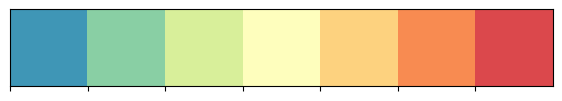

In [12]:
WLtest = np.array([719.,817.,900.,915.,935.,952.,975.])
NWLtest = len(WLtest)
hls_colors = sns.color_palette("Spectral_r", NWLtest)
sns.palplot(hls_colors)

In [13]:
PWV0 = 5.0
transmarray1 = np.zeros((NAM,NWLtest))
for idx,airmass in enumerate(airmasses):
    transmarray1[idx,:]  = emul.GetPWVabsTransparencyArray(WLtest,airmass,PWV0)
for idx,airmass in enumerate(airmasses):
     transmarray1[idx,:] =  transmarray1[idx,:]/transmarray1[0,:]

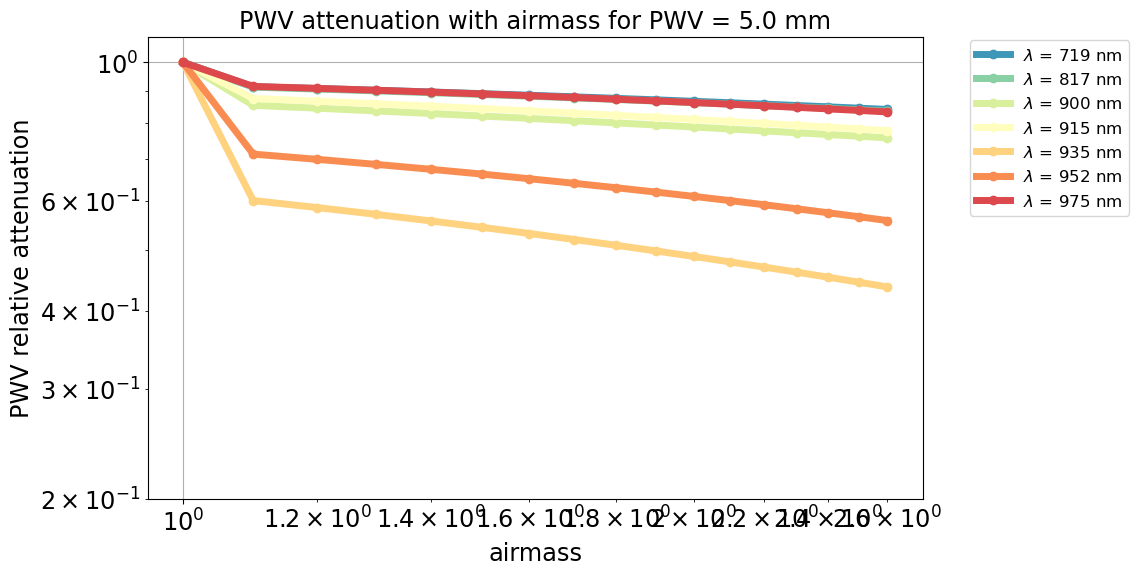

In [14]:
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    label = "$\\lambda$ = "+f"{wl:.0f} nm"
    ax.plot(airmasses,transmarray1[:,idx],'-o',color=color,lw=5,label=label)
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"PWV attenuation with airmass for PWV = {PWV0} mm")
ax.set_ylabel("PWV relative attenuation")
ax.set_xlabel("airmass")
ax.set_ylim(0.2,1.1)
ax.set_xscale("log")
ax.set_yscale("log")

In [15]:
PWV0 = 10.0
transmarray2 = np.zeros((NAM,NWLtest))
for idx,airmass in enumerate(airmasses):
    transmarray2[idx,:]  = emul.GetPWVabsTransparencyArray(WLtest,airmass,PWV0)
for idx,airmass in enumerate(airmasses):
     transmarray2[idx,:] =  transmarray2[idx,:]/transmarray2[0,:]

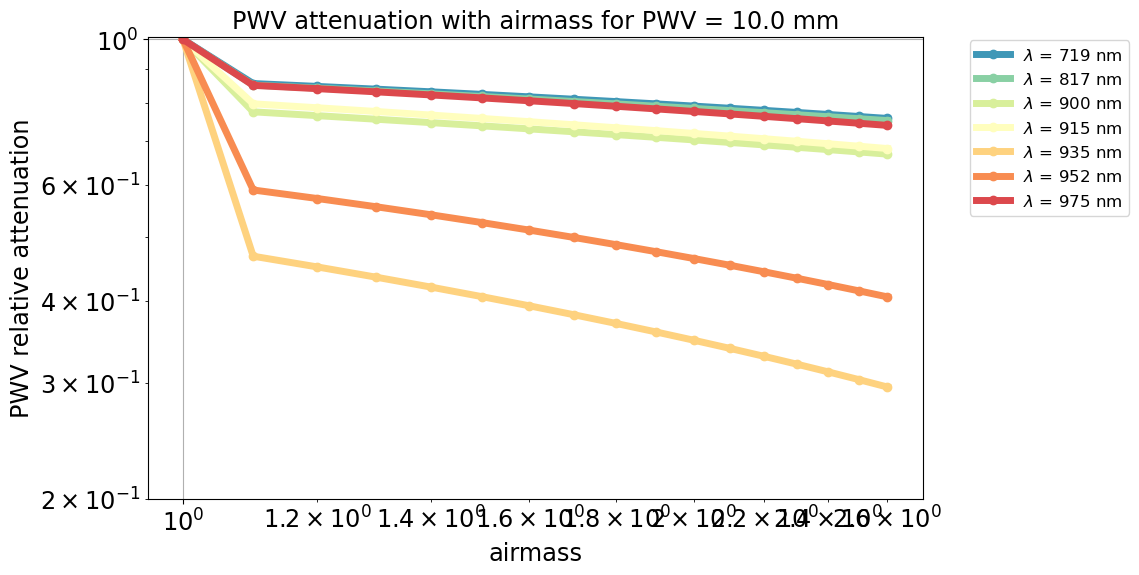

In [16]:
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    label = "$\\lambda$ = "+f"{wl:.0f} nm"
    ax.plot(airmasses,transmarray2[:,idx],'-o',color=color,lw=5,label=label)
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"PWV attenuation with airmass for PWV = {PWV0} mm")
ax.set_ylabel("PWV relative attenuation")
ax.set_xlabel("airmass")
ax.set_ylim(0.2,1.01)
ax.set_xscale("log")
ax.set_yscale("log")

## Fit 

Text(0.5, 0, 'ln(airmass)')

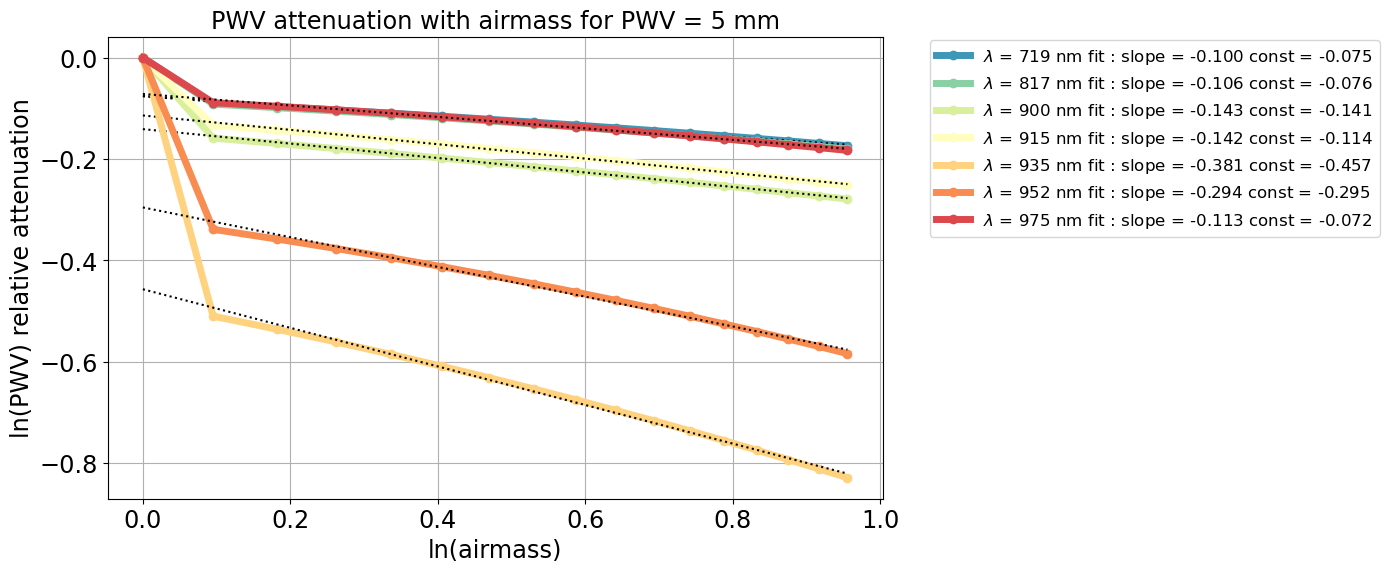

In [17]:
xfit = np.linspace(np.log(airmasses).min(),np.log(airmasses).max(),50)
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    x = np.log(airmasses)
    y = np.log(transmarray1[:,idx])
    z = np.polyfit(x[2:], y[2:], deg=1)
    p = np.poly1d(z)
    gamma = z[0]
    const = z[1]
    label = "$\\lambda$ = "+f"{wl:.0f} nm "+ f"fit : slope = {gamma:.3f} const = {const:.3f}"
    ax.plot(x,y,'-o',color=color,lw=5,label=label)
    ax.plot(xfit,p(xfit),":k")
   
#ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"PWV attenuation with airmass for PWV = 5 mm")
ax.set_ylabel("ln(PWV) relative attenuation")
ax.set_xlabel("ln(airmass)")
#ax.set_ylim(0.8,1.01)
#ax.set_xlim(1,airmasses.max())
#ax.set_xscale("log")
#ax.set_yscale("log")

Text(0.5, 0, 'ln(airmass)')

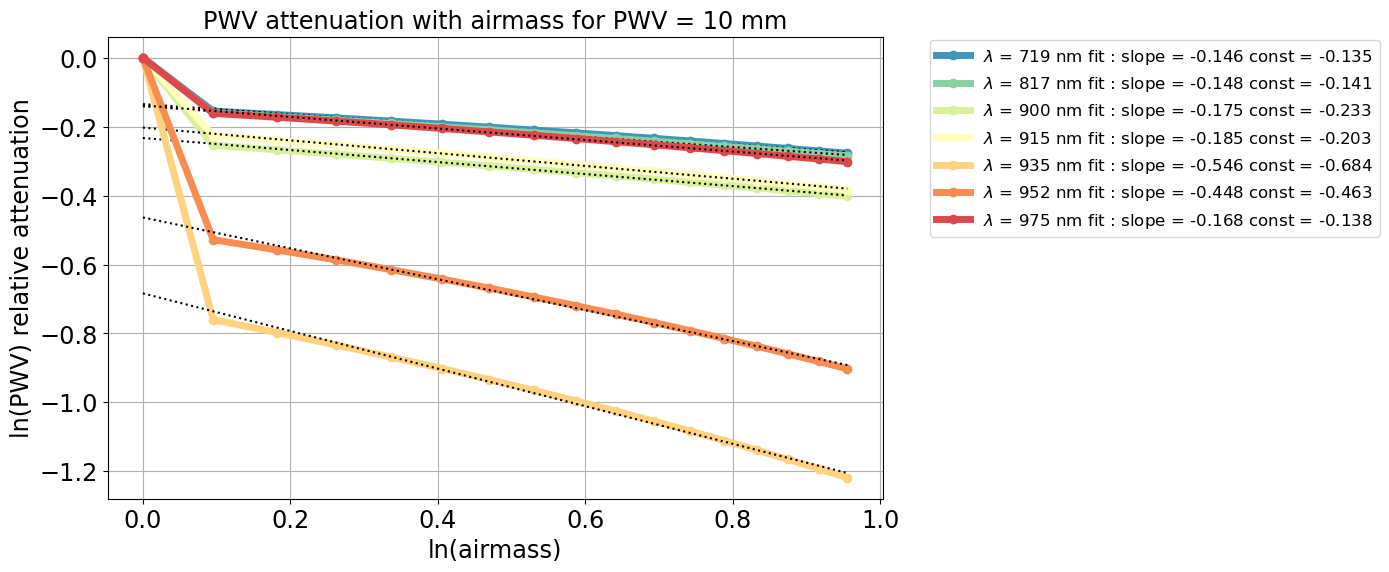

In [18]:
xfit = np.linspace(np.log(airmasses).min(),np.log(airmasses).max(),50)
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    x = np.log(airmasses)
    y = np.log(transmarray2[:,idx])
    z = np.polyfit(x[2:], y[2:], deg=1)
    p = np.poly1d(z)
    gamma = z[0]
    const = z[1]
    label = "$\\lambda$ = "+f"{wl:.0f} nm "+ f"fit : slope = {gamma:.3f} const = {const:.3f}"
    ax.plot(x,y,'-o',color=color,lw=5,label=label)
    ax.plot(xfit,p(xfit),":k")

ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"PWV attenuation with airmass for PWV = 10 mm")
ax.set_ylabel("ln(PWV) relative attenuation")
ax.set_xlabel("ln(airmass)")
#ax.set_ylim(0.8,1.01)
#ax.set_xlim(1,airmasses.max())
#ax.set_xscale("log")
#ax.set_yscale("log")

## Fit with respect of airmass x PWV

Text(0.5, 0, 'ln(airmass x PWV)')

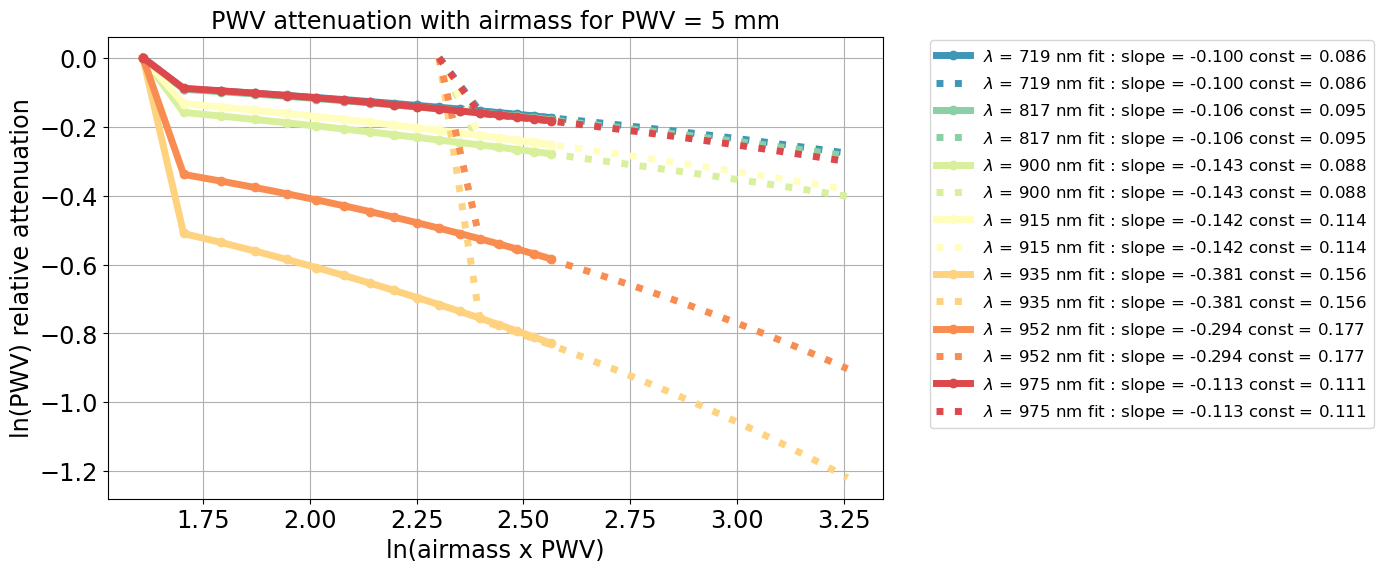

In [21]:
xfit = np.linspace(np.log(airmasses).min(),np.log(airmasses*10).max(),50)
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    x1 = np.log(airmasses*5)
    y1 = np.log(transmarray1[:,idx])
    z1 = np.polyfit(x1[2:], y1[2:], deg=1)
    p1 = np.poly1d(z1)
    gamma = z1[0]
    const = z1[1]
    label = "$\\lambda$ = "+f"{wl:.0f} nm "+ f"fit : slope = {gamma:.3f} const = {const:.3f}"
    ax.plot(x1,y1,'-o',color=color,lw=5,label=label)
    #ax.plot(xfit,p(xfit),":k")

    x2 = np.log(airmasses*10)
    y2 = np.log(transmarray2[:,idx])
    z2 = np.polyfit(x2[2:], y2[2:], deg=1)
    p2 = np.poly1d(z2)
    ax.plot(x2,y2,':',color=color,lw=5,label=label)
    
   
#ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"PWV attenuation with airmass for PWV = 5 mm")
ax.set_ylabel("ln(PWV) relative attenuation")
ax.set_xlabel("ln(airmass x PWV)")
#ax.set_ylim(0.8,1.01)
#ax.set_xlim(1,airmasses.max())
#ax.set_xscale("log")
#ax.set_yscale("log")